# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

### **Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

try:
    data = pd.read_csv('C:/Users/Student/Desktop/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### **Изучите общую информацию о полученном датафрейме.**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#переменуем столбец cityCenters_nearest на city_centers_nearest
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#проверяем
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### **Постройте гистограмму для всех числовых столбцов таблицы на одном графике.**

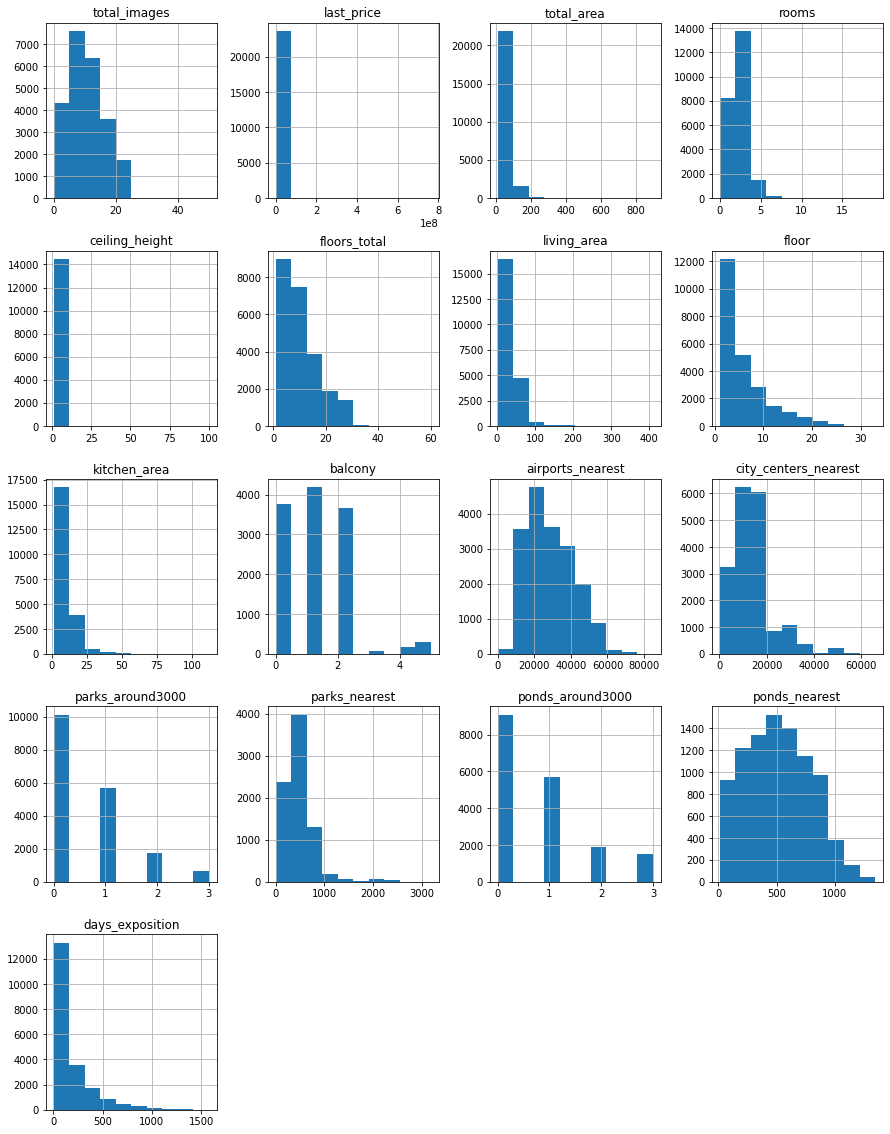

In [4]:
data.hist(figsize=(15, 20));

`last_pricez` цены в основном варьируются до 20 миллионов, но есть и объекты с очень высокими ценами, которые выделяются на общем фоне.

`total_area`: большинство квартир имеют площадь до 100 квадратных метров. Есть и крупные кв более 200 кв.м.

`rooms`: основная масса квартир 1-3 комнатами.

`ceiling_height`: высота потолков в квартирах обычно колеблется от 2,5 до 3 метров.

`floors_total`: большинство зданий это многоэтажки с 5-16 этажами.

`living_area`: жилая площадь большинства кв от 30 до 50 кв м.

`floor`: квартиры на низких этажах от 1 до 5, хотя данные распределены относительно равномерно.

`kitchen_area`: площадь кухни в основном от 8 до 15 кв.м.

`balcony`: многие квартиры имеют балкон, но есть немало объектов и без него.

`airports_nearest`: расстояние до аэропорта чаще всего составляет от 15 до 30 км.

`cityCenters_nearest`: кв чаще всего находится 10-20 км от центра города.

`parks_around3000`: большинство квартир окружены в радиусе 3 км.

`parks_nearest`: ближайший парк для большинства кв находится до 500 метров.

`ponds_around3000`: возле большинства кв есть 1-2 водоёма в радиусе 3 км.

`ponds_nearest`: многие квартиры расположены на расстоянии до 1 км от водоёма.

`days_exposition`: среднее время нахождения квартиры в объявлении до 400 дней, причём самые частые значения — 100-150 дней.

## Выполните предобработку данных

### **Найдите и изучите пропущенные значения в столбцах:**

**Определите, в каких столбцах есть пропуски.**

In [5]:
data.isna().sum()

#в 14 столбцах были найдены пропуски 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заполните пропущенные значения там, где это возможно.**

In [6]:
#Заменяем Nan на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [7]:
#заменяем Nan в числе балконов на 0 
data['balcony'] = data['balcony'].fillna(0)

#перпроверяем заменились ли Nan на 0
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#методом unique() проверил все пропушенные столбцы и выявил, что можно заменить пропуски в 'is_apartment'

data['is_apartment'] = data['is_apartment'].fillna(False)

#проверяем 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.**

**ceiling_height:** возможно, продавцу была неизвестна высота потолков, и он не имел возможности её измерить.

**floors_total:** продавец мог не указать общее количество этажей, посчитав это несущественным. Если проанализировать пропуски в столбце floors_total и сопоставить их с этажом объекта (floor), можно заметить, что редко встречаются пропуски одновременно в обеих колонках. Это может означать, что продавец, указав этаж объекта, решил не указывать общее количество этажей, так как покупатель может уточнить это по телефону.

**balcony** - продавцы могли пропустить информацию о наличии балконов, потому что их нет.

**is_apartment** эти пропуски могут означать, что объект не является апартаментами, поэтому можно заменить на False.

**living_area:** продавцы не всегда знают точную жилую площадь объекта, считая, что указания общей площади (total_area) достаточно для потенциального покупателя.

**kitchen_area:** продавцы могли не владеть точными данными о площади кухни или посчитали эту информацию несущественной.

**locality_name:** пропуски могли возникнуть из-за человеческого фактора — продавец забыл указать название населённого пункта или оно было пропущено в процессе сбора данных.

**airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest:** возможны сбои при выгрузке данных, либо в некоторых случаях рядом с объектом просто нет таких объектов, и информация о них не была указана.

### **Рассмотрите типы данных в каждом столбце**

**Найдите столбцы, в которых нужно изменить тип данных.**

**Преобразуйте тип данных в выбранных столбцах.**


In [9]:
data['first_day_exposition']  = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#проверяем, и видим, что данные тепеь в datetime64
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [10]:
data['balcony'] = data['balcony'].astype(int)

#проверяем, и видим, что данные тепеь в int64
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

**В ячейке с типом markdown поясните, почему нужно изменить тип данных.**

**data['first_day_exposition']** - изначально был object, но так как там указаны дата и время изменили тип данных на datetime64

**data['balcony']** - данные представлены целыми числами, лучше хранить в виде int, так как дробные значения здесь не имеют смысла. 

### **Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты**

In [11]:
#находим все неявные дупликаты
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок', 'поселок городского типа', 'городской', 'городской поселок', 'деревня', 'село', 'станции', 'коттеджный', 'садовое товарищество', 'имени'], '', regex=True)
)

Заменил все буквы **"ё" на "е"** с помощью метода `str.replace()`, чтобы избежать дублирования и далее удалил описательные слова, такие как **"поселок", "деревня", "село", "городской поселок", "поселок городского типа"** и другие с помощью метода `replace()`. Это позволило упростить названия и привело к единому виду. Так как **"ё" заменил на "е"** прописал что убрал только **"поселок"**", так как убрал поселок остаются слова **городского типа**, что будет не особо понятно и удалил эти слова соотвественно. И так остальные по данному принциппу. 

## Добавьте в таблицу новые столбцы

**цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)**

In [13]:
data['price_per_square'] = (data['last_price'] / data['total_area']).round(2)
data['price_per_square']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_square, Length: 23699, dtype: float64

**день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [14]:
data['publish_weekday'] = data['first_day_exposition'].dt.weekday
data['publish_weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: publish_weekday, Length: 23699, dtype: int64

**месяц публикации объявления**

In [15]:
data['publish_month'] = data['first_day_exposition'].dt.month
data['publish_month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: publish_month, Length: 23699, dtype: int64

**год публикации объявления**

In [16]:
data['publish_year'] = data['first_day_exposition'].dt.year
data['publish_year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: publish_year, Length: 23699, dtype: int64

**тип этажа квартиры (значения — «‎первый», «последний», «другой»)**

In [17]:
#прописываем функцию, если этаж будет равен 1, то это "первый", если этаж равен всего этажей в доме то это "последний" и остальные "другие"
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# приминяем функцию через apply, чтобы на вход в функцию отправлялись строки, нужно указать параметр axis=1
data['floor_type'] = data.apply(type_floor, axis=1)


**расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).**

In [18]:
data['city_center_km'] = (data['city_centers_nearest'] / 1000).round()
data['city_center_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_center_km, Length: 23699, dtype: float64

## Проведите исследовательский анализ данных

**постройте отдельные гистограммы для каждого параметров ниже.**

count    23698.000000
mean        60.313220
std         35.235136
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        631.200000
Name: total_area, dtype: float64

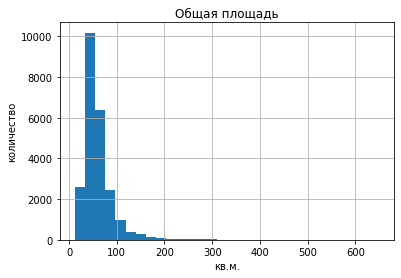

In [19]:
#общая площадь total_area

data = data[(data['total_area'] >= 12) & (data['total_area'] <= 650)]

data['total_area'].hist(bins=30,range=(12, 650))
plt.title('Общая площадь')
plt.xlabel('кв.м.')
plt.ylabel('количество')
data['total_area'].describe()


Отбросили явно аномальные данные которые превыщают 650 кв.м. Большинство квартир имеют площадь от 40 до 70 кв. м.

count    21795.000000
mean        34.440636
std         21.883823
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64

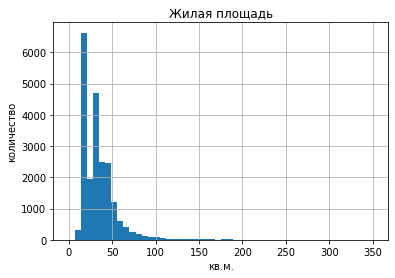

In [20]:
#жилая площадь living_area 

data['living_area'].hist(bins=50, range=(0, 350))
plt.title('Жилая площадь')
plt.xlabel('кв.м.')
plt.ylabel('количество')
data['living_area'].describe()


Основная масса квартир имеет жилую площадь в диапазоне от 18 до 42 кв м

count    21420.000000
mean        10.565072
std          5.864766
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

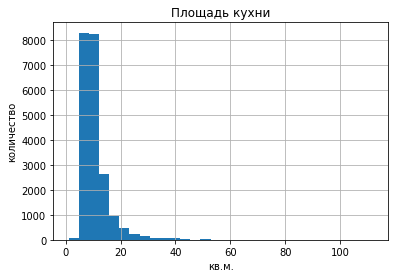

In [21]:
data['kitchen_area'].hist(bins=30, range=(1, 112))
plt.title('Площадь кухни')
plt.xlabel('кв.м.')
plt.ylabel('количество')
data['kitchen_area'].describe()


Чаще всего кухни указаны 7-12 кв.м. Просторные кухни (20+ кв.м) встречаются редко.

count    2.369600e+04
mean     6.492452e+06
std      9.336677e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799250e+06
max      4.013000e+08
Name: last_price, dtype: float64

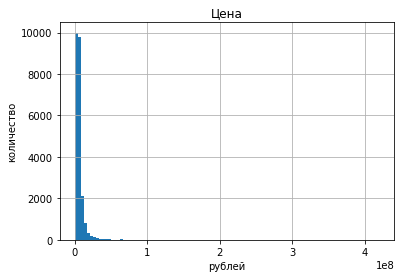

In [22]:
#цена объекта last_price


data = data[(data['last_price'] > 13000) & (data['last_price'] < 700000000)]

data['last_price'].hist(bins=100, range=(13000, 420000000))
plt.title('Цена')
plt.xlabel('рублей')
plt.ylabel('количество')
data['last_price'].describe()


Самая низкая (12000) и самая высокая (763000000) цены были сильно занижены и завышены они были удалены. 

Основное предложение на рынке квартир сосредоточено в диапазоне цен до 10 миллионов рублей, но присутствуют и элитные квартиры с гораздо более высокой стоимостью.


count    23497.000000
mean         2.086054
std          1.054079
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: rooms, dtype: float64

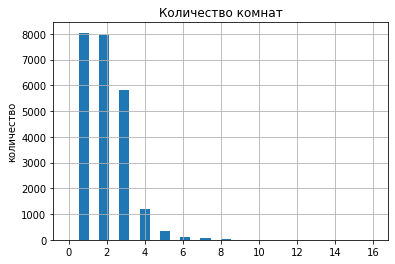

In [23]:
#количество комнат rooms

data = data[(data['rooms'] > 0) & (data['rooms'] < 16)]

data['rooms'].hist(bins=30, range=(0, 16)) 
plt.title('Количество комнат')
plt.ylabel('количество')

data['rooms'].describe() 

Основная масса квартир 1-3 комнатные, встречаются также и до 19 комнат, но крайне редко. 

count    23481.000000
mean         2.698785
std          0.247718
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

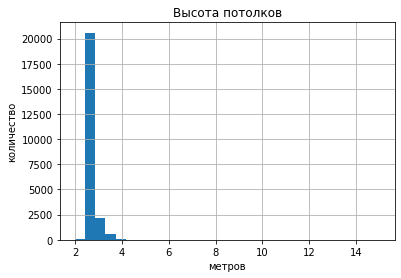

In [24]:
#высота потолков ceiling_height


#пропишем функцию, которая в случае обнаружение потолков более или равно 20 м разделит их на 10 и получится правильные данные.

def ceiling_improvements(height):
    if pd.isna(height):
        return height  # Возвращаем пропущенное значение как есть
    if 33 > height >= 20:
        return height / 10
    return height

data['ceiling_height'] = data['ceiling_height'].apply(ceiling_improvements);


data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 15)];


data['ceiling_height'].hist(bins=30, range=(2, 15))
plt.title('Высота потолков')
plt.xlabel('метров')
plt.ylabel('количество')

data['ceiling_height'].describe()

Между цифрами от 20м до 32м были проставлены точки, так возможно при заполнении забыли поставить точки. Были данные 100м потолка, которые были удалены вместе с теми что ниже 2 м. 

Большинство квартир имеют высоту потолков в диапазоне от 2.5 до 2.8 метров, а выбросы превышающие 4 метра, скорее всего, представляют собой редкие случаи или ошибки в данных.

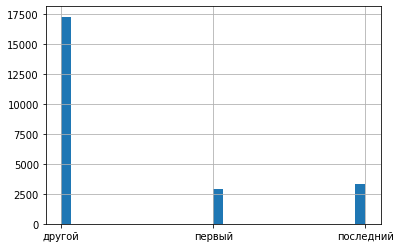

In [25]:
#тип этажа квартиры («первый», «последний», «другой») floor_type

data['floor_type'].hist(bins=30);


По графику видно, что квартир на последних этажах больше чем на первых. Большинство квартир рассположены между первыми и последними этажами.

count    23398.000000
mean        10.617241
std          6.554077
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

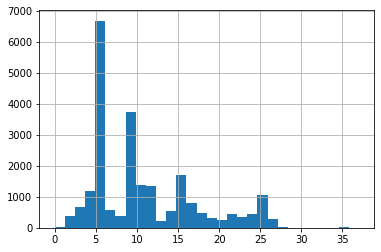

In [26]:
#общее количество этажей в доме floors_total

#проверив аномальные данные выявились 2 квартиры в общим количеством этажей 50 (Кронштадт) и 60 (Санкт-Петербург)
#провериф количество комнат и город появились мысли, что при ручной забивке добавили случайным образом дополнительный 0 
data[data['floors_total'] > 50][['locality_name', 'rooms']]

# в связи с чем решено было привести данные в нормальный вид
def floors_total_imprv(floor):
    if floor >= 50:
        return floor / 10
    return floor

data['floors_total'] = data['floors_total'].apply(floors_total_imprv)

data['floors_total'].hist(bins=30, range=(0, 37))
data['floors_total'].describe()


Основное количество зданий приходится на диапазон от 5 до 14 этажей. Высотные здания с 30 и более этажами встречаются значительно реже.

count    18050.000000
mean     14198.582438
std       8627.441338
min        181.000000
25%       9235.000000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

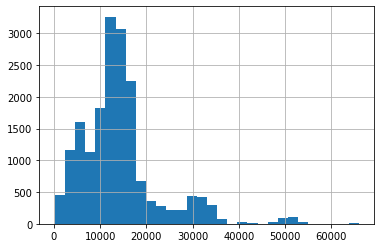

In [27]:
#расстояние до центра города в метрах city_centers_nearest

data['city_centers_nearest'].hist(bins=30, range=(181, 66000))
data['city_centers_nearest'].describe()

Большинство объектов располагается на расстоянии от 9 до 16 км от центра города, однако и значительные выбросы, которые находятся как очень близко (меньше 1 км), так и на большом удалении (до 66 км).

count    8042.000000
mean      490.367695
std       342.500913
min         1.000000
25%       287.250000
50%       453.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

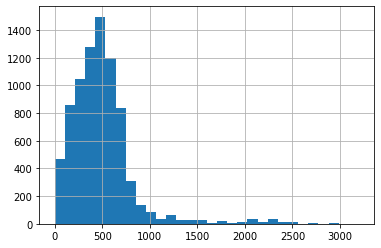

In [28]:
data['parks_nearest'].hist(bins=30, range=(0, 3200))
data['parks_nearest'].describe()

Большинство кв имеют доступ к паркам в пределах 500-600 м, также имеются кв которые расположены подальше от парков до 3 км

count    23179.000000
mean         0.529876
std          0.820399
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: balcony, dtype: float64

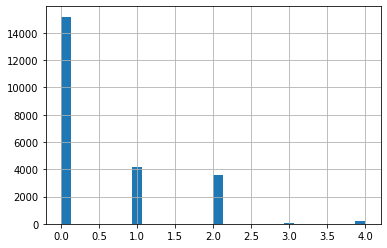

In [29]:
data = data[(data['balcony'] < 5)]
data['balcony'].hist(bins=30, range=(0, 4));
data['balcony'].describe()

Большинство квартир не имеют балкона или имеют только один, тогда как наличие двух и более балконов — редкость и связано с более крупными объектами.

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

Постройте гистограмму.

count    20076.000000
mean       181.650926
std        220.268261
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

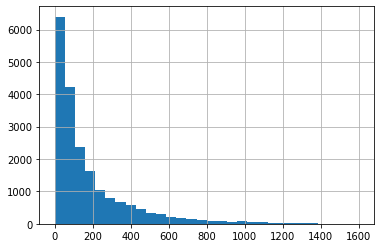

In [30]:
data['days_exposition'].hist(bins=30, range=(0, 1600))

data['days_exposition'].describe()

Посчитайте среднее и медиану.

In [31]:
day_exp_median = data['days_exposition'].median()

day_exp_median

96.0

In [32]:
day_exp_mean = data['days_exposition'].mean()
day_exp_mean

181.65092647937837

**Опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими:**
Продажи, которые совершаются быстрее **96 дней** можно считать **быстрыми.**

Продажи, которые занимают от **96 до 181 дней**, можно считать стандартными, а те, что занимают больше времени, но меньше **181 дней — долгими**

**Более 250 дней**, можно считать **необычно долгими**

**Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта** (общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год)). 

In [33]:
#для этого применим Коэффициент Пирсона 

factor_appears_corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'publish_weekday', 'publish_month', 'publish_year']].corr()
factor_appears_corr

,last_price,total_area,living_area,kitchen_area,rooms,publish_weekday,publish_month,publish_year
last_price,1.000000,0.693346,0.602880,0.512106,0.392126,-0.001621,-0.002855,-0.048711
total_area,0.693346,1.000000,0.939153,0.602574,0.760521,-0.004797,0.004880,-0.081868
living_area,0.602880,0.939153,1.000000,0.420760,0.849726,-0.005932,-0.002995,-0.073283
kitchen_area,0.512106,0.602574,0.420760,1.000000,0.265065,-0.008778,0.001099,-0.055537
rooms,0.392126,0.760521,0.849726,0.265065,1.000000,-0.003640,-0.000815,-0.055638
publish_weekday,-0.001621,-0.004797,-0.005932,-0.008778,-0.003640,1.000000,0.007736,-0.003404
publish_month,-0.002855,0.004880,-0.002995,0.001099,-0.000815,0.007736,1.000000,-0.268652
publish_year,-0.048711,-0.081868,-0.073283,-0.055537,-0.055638,-0.003404,-0.268652,1.000000


**Общая площадь** корреляция 0.69 самый сильный фактор, напрямую влияющий на стоимость. Чем больше площадь, тем выше цена.

**Жилая площадь** также  влияет на стоимость объекта, так как корреляция составляет 0.60, немного меньше, чем у общей площади. 

**Площадь кухни**, корреляция 0.51, также является значимым фактором.

**Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.**

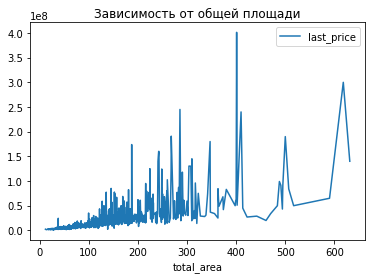

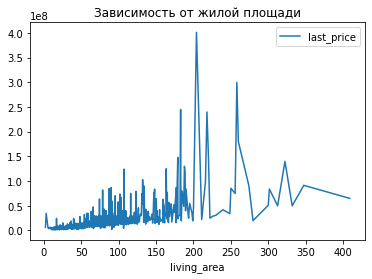

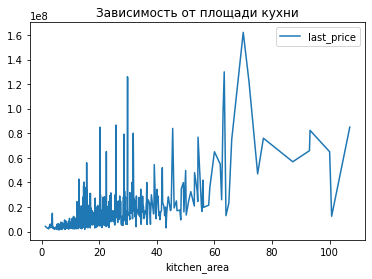

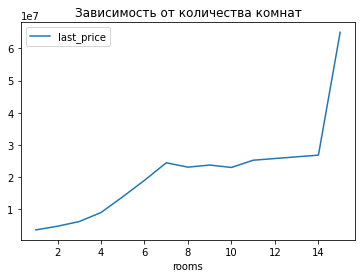

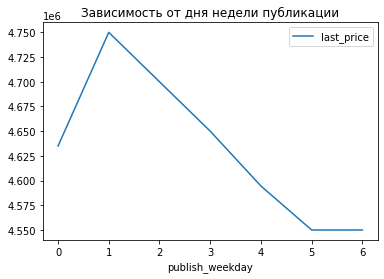

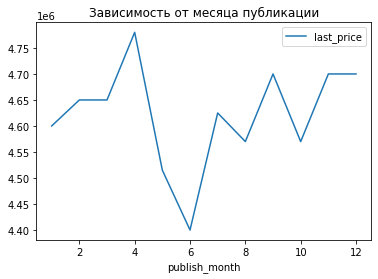

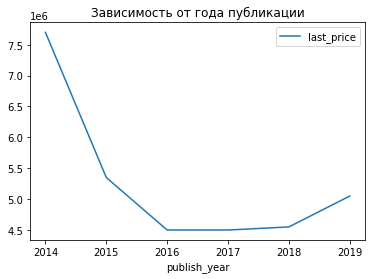

In [34]:
#сводных таблиц для подготовки данных
# 'kitchen_area', 'rooms', 'publish_weekday', 'publish_month', 'publish_year'

area_price = (
    data.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(title='Зависимость от общей площади')
             )

liv_area_price = (
    data.pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(title='Зависимость от жилой площади')
             )

kitc_area_price = (
    data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(title='Зависимость от площади кухни')
             )

rooms_price = (
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(title='Зависимость от количества комнат')
             )
weekday_price = (
    data.pivot_table(index='publish_weekday', values='last_price', aggfunc='median')
    .plot(title='Зависимость от дня недели публикации')
             )

month_price = (
    data.pivot_table(index='publish_month', values='last_price', aggfunc='median')
    .plot(title='Зависимость от месяца публикации')
             )
year_price = (
    data.pivot_table(index='publish_year', values='last_price', aggfunc='median')
    .plot(title='Зависимость от года публикации')
             )

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [35]:
#посчитаем количество объявлений и среднюю цену за кв.м.

locality_info = data.pivot_table(
    index='locality_name',
    values='price_per_square',
    aggfunc=['count', 'mean'])

#переминуем столбцы для удобства
locality_info.columns = ['count_listing', 'price_mean']
locality_info

#выявим топ 10, уберем Санкт-Петербург, так как он является городом а не населенным пунктом
top_10_listing = locality_info[locality_info.index != 'Санкт-Петербург'].sort_values(by='count_listing', ascending=False).head(10)
top_10_listing


,count_listing,price_mean
locality_name,,
Мурино,520,84973.605212
Шушары,432,78557.999861
Всеволожск,383,68691.575587
Пушкин,369,103125.819377
Колпино,331,75328.635468
Парголово,323,90289.778019
Гатчина,301,68634.397043
Кудрово,279,92585.857097
Выборг,235,58238.143277


In [36]:
#населённые пункты с самой высокой стоимостью за кв.м.
most_expensive = top_10_listing.loc[top_10_listing['price_mean'].idxmax()]
most_expensive

count_listing       369.000000
price_mean       103125.819377
Name: Пушкин, dtype: float64

In [37]:
#населённые пункты с самой низкой стоимостью за кв.м.
least_expensive = top_10_listing.loc[top_10_listing['price_mean'].idxmin()]
least_expensive


count_listing      235.000000
price_mean       58238.143277
Name: Выборг, dtype: float64

<div class="alert alert-success">

**Артём:** 👍 Верно.

</div>

**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.**

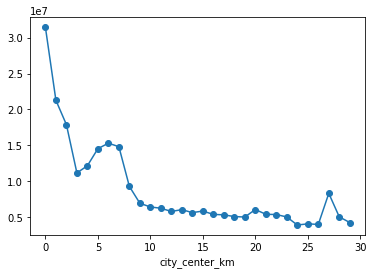

In [38]:
price_by_km = (
    data[data['locality_name'] == 'Санкт-Петербург']
    .groupby('city_center_km')['last_price'].mean()
)

price_by_km.plot(x='city_center_km', y='last_price', marker='o');

**Чем ближе объект к центру города, тем выше его стоимость**

## Напишите общий вывод

1. **Вывод по параметрам:**

**Общая площадь**: Большинство квартир от 30 до 100 кв.м. Крупные квартиры более 200 кв.м редки.
   
**Жилая площадь**: Обычно от 30 до 60 кв.м, с увеличением для многокомнатных квартир.

**Площадь кухни**: Чаще всего 8-15 кв.м. Просторные кухни (20+ кв.м) встречаются редко.

**Цена объекта**: Основная масса квартир до 10 млн руб. Цены свыше 20 млн редки и характерны для элитной недвижимости.

**Количество комнат**: Преобладают квартиры с 1-3 комнатами. Более 4 комнат — реже и дороже.

**Высота потолков**: Обычно от 2.5 до 3 метров. Потолки выше 3 м редки и характерны для элитных объектов.

**Тип этажа**: Первый и последний этажи менее популярны. Большинство квартир на средних этажах.

**Этажность дома**: Большинство домов имеют от 5 до 16 этажей, меньше 5 этажей — редкость.

**Расстояние до центра**: Большинство квартир находятся на расстоянии 10-20 км от центра города.

**Расстояние до парка**: Большинство квартир расположены в пределах 500 метров от парка, что повышает их привлекательность.

2. **Влияние времени продажи на цену:**

Продажи, которые совершались быстрее **45 дней** можно считать **быстрыми.** Те, что занимали от **45 до 104 дней**, являются стандартными, а те, что занимают больше времени, но меньше **249 дней — долгими**. **Более 249 дней**, можно считать **необычно долгими**


3. **Факторы влияющие на стоимость квартиры**

**Общая площадь**: является основным фактором, влияющим на стоимость недвижимости. Корреляция между общей площадью и ценой составляет 0.70. Это свидетельствует о том, что квартиры с большей площадью стоят дороже.

**Жилая площадь**: второй по важности фактор, влияющий на стоимость. Корреляция составляет 0.61. Большая жилая площадь также способствует увеличению стоимости объекта.

**Площадь кухни**: корреляция составляет 0.52, что также подтверждает значимость этого параметра. Квартиры с более просторными кухнями имеют более высокую стоимость.

**Количество комнат**: как показали графики и корреляционный анализ, количество комнат также влияет на цену квартиры, хотя зависимость не такая сильная, как у площади.

**Дата размещения (день недели, месяц, год)**: корреляция с ценой для этих параметров незначительна (-0.02, 0.00, -0.06), что говорит о том, что время публикации объявления практически не влияет на цену.

4. **Населённые пункты с самой высокой и низкой стоимостью квадратного метра**

Было выявлено 10 населённых пунктов с наибольшим количеством объявлений о продаже квартир. Мы исключили Санкт-Петербург, чтобы сосредоточиться на соседних населённых пунктах.

   **Пушкин** занимает первое место по средней стоимости квадратного метра. Средняя цена составляет **103,920 рублей** при количестве объявлений **234**.

   **Всеволожск** имеет самую низкую среднюю цену за квадратный метр, которая составляет **67,339 рублей** при количестве объявлений **267**. Это может свидетельствовать о более удалённом расположении, менее развитой инфраструктуре или спросе на жилье в этом районе.
   
5. **Зависимость стоимости объектов от расстояния до центра города**

Чем ближе объект недвижимости **к центру** Санкт-Петербурга, тем выше его стоимость. Однако существуют **исключения**, связанные с популярными жилыми районами или элитными объектами, что отражено на графике небольшими подъёмами в средней цене на определённых расстояниях.
